In [12]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy

import numpy as np
import textwrap
from scipy.stats import kendalltau

## Read in the data

In [13]:
store = pd.read_csv('store.csv')

In [14]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [15]:
store.shape

(1115, 10)

In [16]:
train = pd.read_csv('train.csv')
train.head()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_2246/3062304800.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [17]:
test = pd.read_csv('test.csv')
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


## Merge dataframes: train with store, test with store

In [18]:
train_merged = train.merge(store, how='left', on='Store')
train_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01/01/2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,01/01/2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,01/01/2013,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,01/01/2013,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [19]:
test_merged = test.merge(store, how='left', on='Store')
test_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [20]:
test_merged['Date'].unique()

array(['17/09/2015', '16/09/2015', '15/09/2015', '14/09/2015',
       '13/09/2015', '12/09/2015', '11/09/2015', '10/09/2015',
       '09/09/2015', '08/09/2015', '07/09/2015', '06/09/2015',
       '05/09/2015', '04/09/2015', '03/09/2015', '02/09/2015',
       '01/09/2015', '31/08/2015', '30/08/2015', '29/08/2015',
       '28/08/2015', '27/08/2015', '26/08/2015', '25/08/2015',
       '24/08/2015', '23/08/2015', '22/08/2015', '21/08/2015',
       '20/08/2015', '19/08/2015', '18/08/2015', '17/08/2015',
       '16/08/2015', '15/08/2015', '14/08/2015', '13/08/2015',
       '12/08/2015', '11/08/2015', '10/08/2015', '09/08/2015',
       '08/08/2015', '07/08/2015', '06/08/2015', '05/08/2015',
       '04/08/2015', '03/08/2015', '02/08/2015', '01/08/2015'],
      dtype=object)

In [21]:
# save merged dataframes as csv
test_merged.to_csv('test_merged.csv', date_format='%d-%m-%Y')
train_merged.to_csv('train_merged.csv')

## Data Exploration

### Null values

In [22]:
train_merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [23]:
# check same number of stores without promo2 as missing promo start dates
train_merged.loc[train_merged['Promo2'] == 0].shape[0]

508031

In [24]:
# fill promo start dates with 0 as no promo
train_merged['Promo2SinceWeek'] = train_merged['Promo2SinceWeek'].fillna(0)
train_merged['Promo2SinceYear'] = train_merged['Promo2SinceYear'].fillna(0)
train_merged['PromoInterval'] = train_merged['PromoInterval'].fillna(0)

In [25]:
# fill missing competition distance with 0
train_merged['CompetitionDistance'] = train_merged['CompetitionDistance'].fillna(0)

#fill competition open since columnswith 0 where competition distance is missing
train_merged.loc[train_merged['CompetitionDistance'] == 0, 'CompetitionOpenSinceMonth'] = 0
train_merged.loc[train_merged['CompetitionDistance'] == 0, 'CompetitionOpenSinceYear'] = 0

In [26]:
train_merged.loc[train_merged['CompetitionDistance'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,31/07/2015,10052,973,1,1,0,1,d,a,0.0,0.0,0.0,0,0.0,0.0,0
621,622,5,31/07/2015,6306,540,1,1,0,1,a,c,0.0,0.0,0.0,0,0.0,0.0,0
878,879,5,31/07/2015,6000,466,1,1,0,0,d,a,0.0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,30/07/2015,9030,883,1,1,0,1,d,a,0.0,0.0,0.0,0,0.0,0.0,0
1736,622,4,30/07/2015,5412,406,1,1,0,1,a,c,0.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,02/01/2013,4080,451,1,0,0,1,a,c,0.0,0.0,0.0,0,0.0,0.0,0
1015858,879,3,02/01/2013,3077,326,1,0,0,1,d,a,0.0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,01/01/2013,0,0,0,0,a,1,d,a,0.0,0.0,0.0,0,0.0,0.0,0
1016716,622,2,01/01/2013,0,0,0,0,a,1,a,c,0.0,0.0,0.0,0,0.0,0.0,0


In [27]:
train_merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

### Correct value formats

In [28]:
train_merged.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       13
CompetitionOpenSinceYear        24
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

In [29]:
# should be 4 unique values for state holiday
train_merged.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [30]:
train_merged['StateHoliday'].replace({'0': 'nh'}, inplace=True)
train_merged['StateHoliday'].replace({0: 'nh'}, inplace=True)
train_merged.StateHoliday.value_counts()

StateHoliday
nh    986159
a      20260
b       6690
c       4100
Name: count, dtype: int64

### Drop 'closed' records as sales = 0

In [31]:
train_merged['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [32]:
# drop records with store closed as sales == 0 
train_open = train_merged[train_merged.Open == 1].copy()
train_open.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       13
CompetitionOpenSinceYear        24
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

In [33]:
train_open = train_open.drop(columns = 'Open')

### Check descriptive statistics for unusual values

In [34]:
train_open.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,577959.000000,577959.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580,5443.849764,7.197552,2001.100300,0.498684,11.596118,1003.230065
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103,7804.251737,3.234615,123.445871,0.499999,15.307873,1005.874806
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,700.000000,4.000000,2006.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,6880.000000,10.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [35]:
train_open['Customers'].nlargest(n=10)

993496    7388
319810    5494
101726    5458
432096    5387
444361    5297
87231     5192
129601    5152
745411    5145
132946    5132
776631    5112
Name: Customers, dtype: int64

In [36]:
train_open.loc[train_open['Customers'] > 7000]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
993496,817,2,22/01/2013,27190,7388,1,nh,0,a,a,140.0,3.0,2006.0,0,0.0,0.0,0


In [37]:
mean = train_open.loc[train_open['Store'] == 817, 'Customers'].mean()

In [38]:
train_open.loc[train_open['Customers'] > 7000, 'Customers'] = mean.astype(int)

In [39]:
train_open['Customers'].nlargest(n=5)

319810    5494
101726    5458
432096    5387
444361    5297
87231     5192
Name: Customers, dtype: int64

### Variable distributions

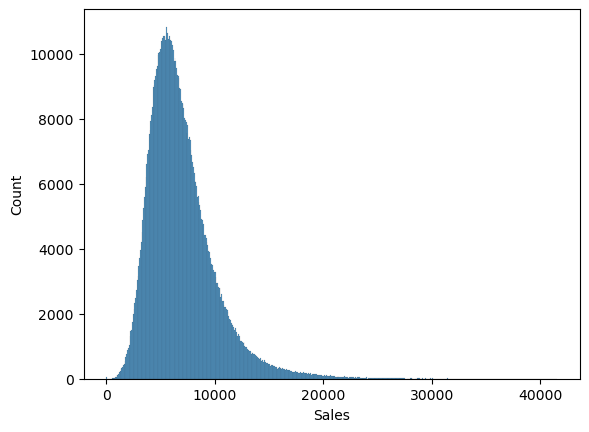

In [40]:
# distribution of sales
sns.histplot(data=train_open, x='Sales');

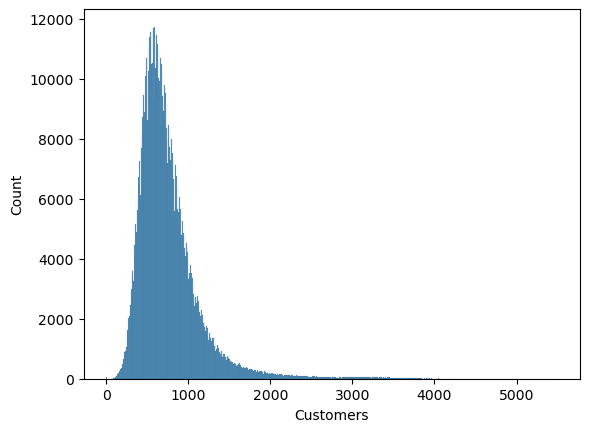

In [41]:
# distribution of customers
sns.histplot(data=train_open, x='Customers');

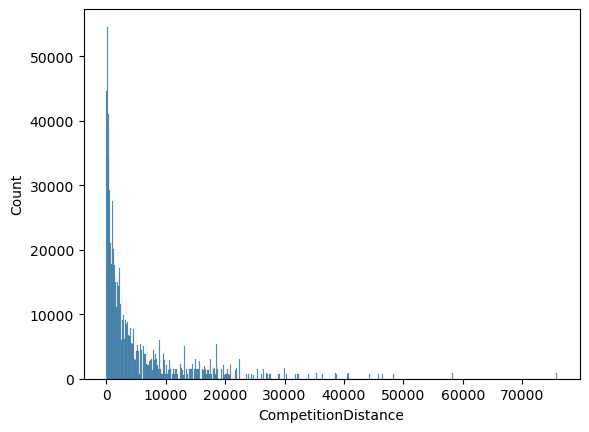

In [42]:
# distribution of competition distances
sns.histplot(data=train_open, x='CompetitionDistance');

### Relationships between variables

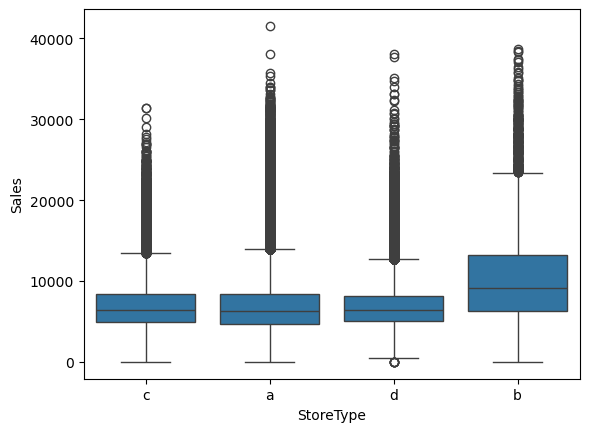

In [43]:
# sales by store type
sns.boxplot(data=train_open, x='StoreType', y='Sales');

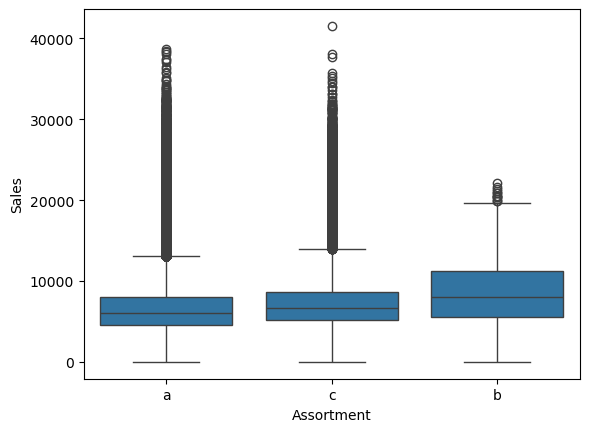

In [44]:
# sales by assortment: a = basic, b = extra, c = extended
sns.boxplot(data=train_open, x='Assortment', y='Sales');

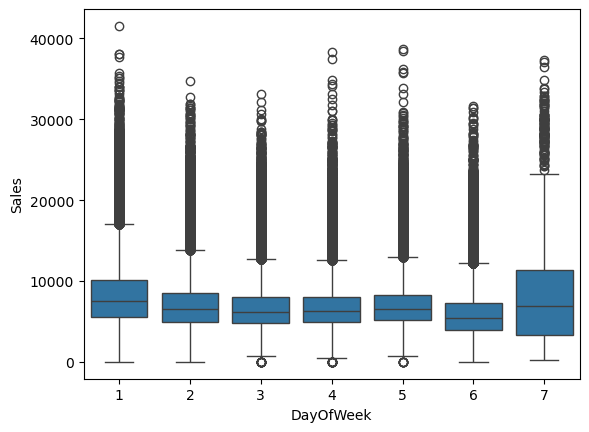

In [45]:
# sales by day of the week
sns.boxplot(data=train_open, x='DayOfWeek', y='Sales');

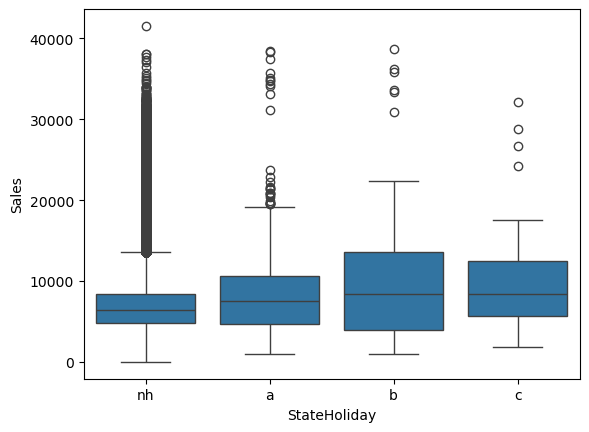

In [46]:
# sales by holiday: a = public holiday, b = Easter holiday, c = Christmas, 0 = none
sns.boxplot(data=train_open, x='StateHoliday', y='Sales');

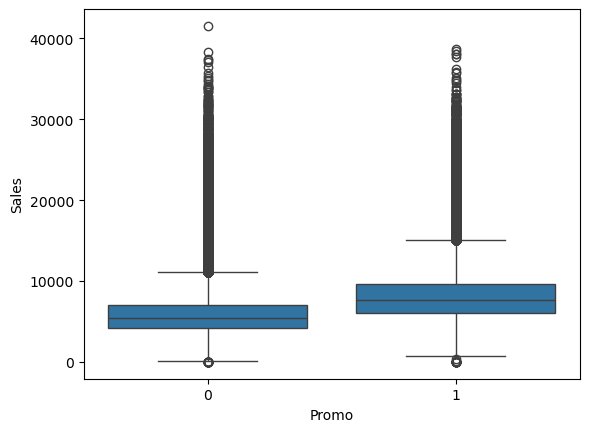

In [47]:
# sales by store promotions
sns.boxplot(data=train_open, x='Promo', y='Sales');

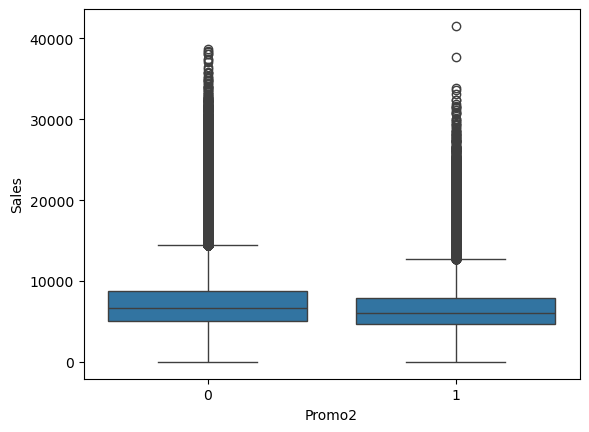

In [48]:
# sales by national promotions
sns.boxplot(data=train_open, x='Promo2', y='Sales');

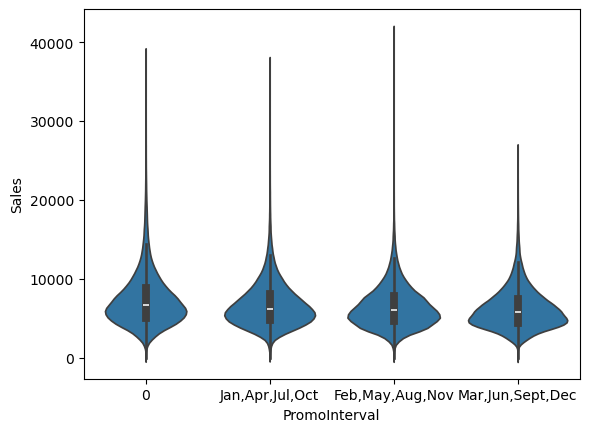

In [49]:
sns.violinplot(data=train_open, x='PromoInterval', y='Sales');

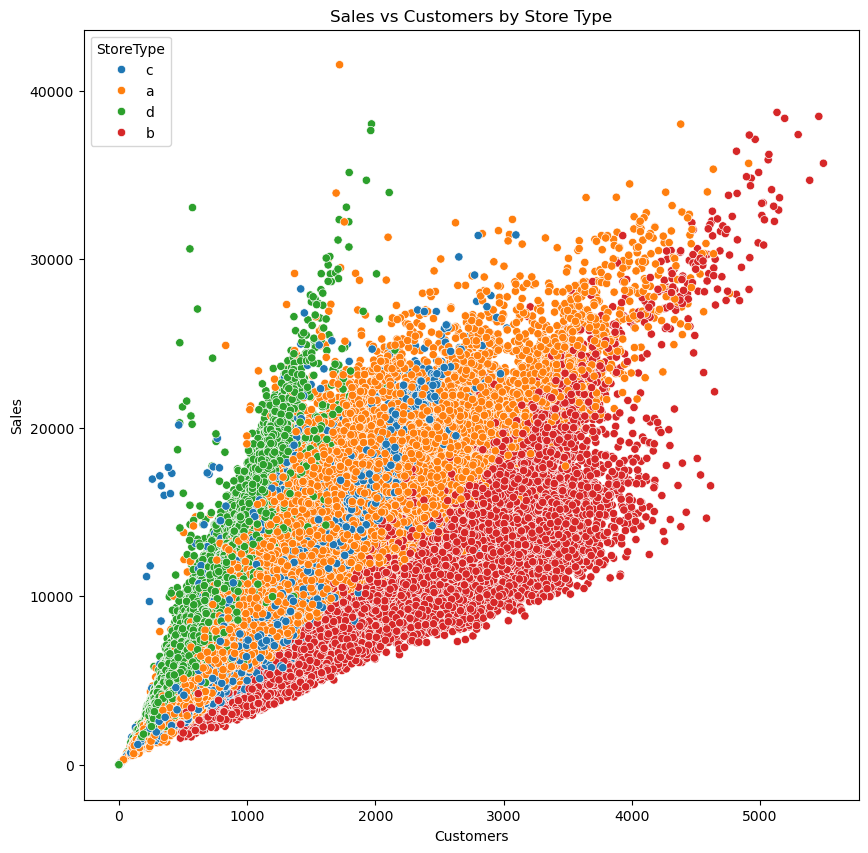

In [50]:
# relationship between sales and customers by store type
plt.figure(figsize=(10, 10))
sns.scatterplot(data=train_open, y='Sales', x='Customers', hue='StoreType')
plt.title("Sales vs Customers by Store Type");

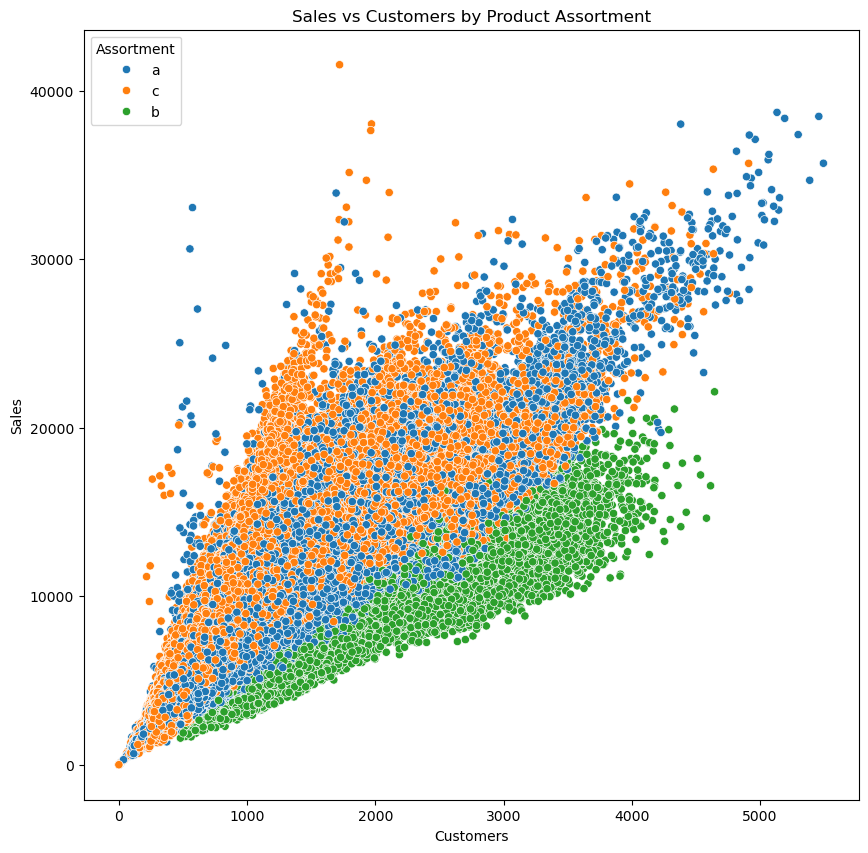

In [51]:
# relationship between sales and customers by assortment
plt.figure(figsize=(10, 10))
sns.scatterplot(data=train_open, y='Sales', x='Customers', hue='Assortment')
plt.title("Sales vs Customers by Product Assortment");

In [52]:
crosstab = pd.crosstab(index=train_open['Assortment'], columns=train_open['StoreType'])
crosstab

StoreType,a,b,c,d
Assortment,,,,
a,286053,6409,58561,93886
b,0,8212,0,0
c,171024,942,54417,164888


## Feature Engineering

### Day, Month, Year

In [53]:
# create seperate day, month, year variables

In [54]:
train_open['Date'].dtypes

dtype('O')

In [55]:
# Convert date to datetime format
train_open['Date'] = pd.to_datetime(train_open['Date'], dayfirst=True)

In [56]:
train_open['Date'].dtypes

dtype('<M8[ns]')

In [57]:
# create seperate variables 
train_open['Year'] = train_open['Date'].dt.year
train_open['Month'] = train_open['Date'].dt.month
train_open['Day'] = train_open['Date'].dt.day

In [58]:
train_open.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,nh,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,nh,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,nh,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,nh,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,nh,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


In [59]:
monthly_sales = train_open.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales

,Year,Month,Sales
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369
3,2013,4,183431432
4,2013,5,185411063
5,2013,6,180702351
6,2013,7,208843882
7,2013,8,198042727
8,2013,9,178053963
9,2013,10,187662330


In [60]:
# Pivot the data for plotting
pivot_df = monthly_sales.pivot_table(values='Sales', index='Month', columns='Year', aggfunc='sum')

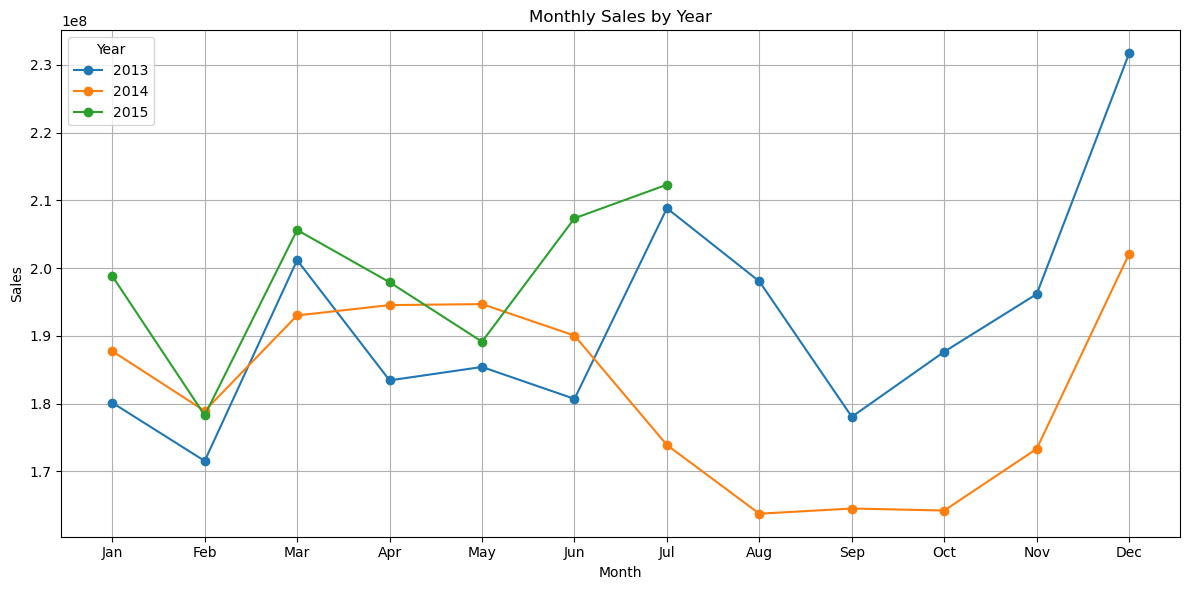

In [61]:
plt.figure(figsize=(12, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=column)

plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# forecast period starts end of July 2015, however looks like there is missing sales data June 2014-Jan 2015
monthly_counts = train_open.groupby(['Year', 'Month']).size().reset_index(name='Count')
monthly_counts

,Year,Month,Count
0,2013,1,28869
1,2013,2,26683
2,2013,3,27892
3,2013,4,27880
4,2013,5,26202
5,2013,6,27942
6,2013,7,30166
7,2013,8,30025
8,2013,9,27981
9,2013,10,28990


In [63]:
# Pivot the data for plotting
count_pivot = monthly_counts.pivot_table(values='Count', index='Month', columns='Year', aggfunc='sum')

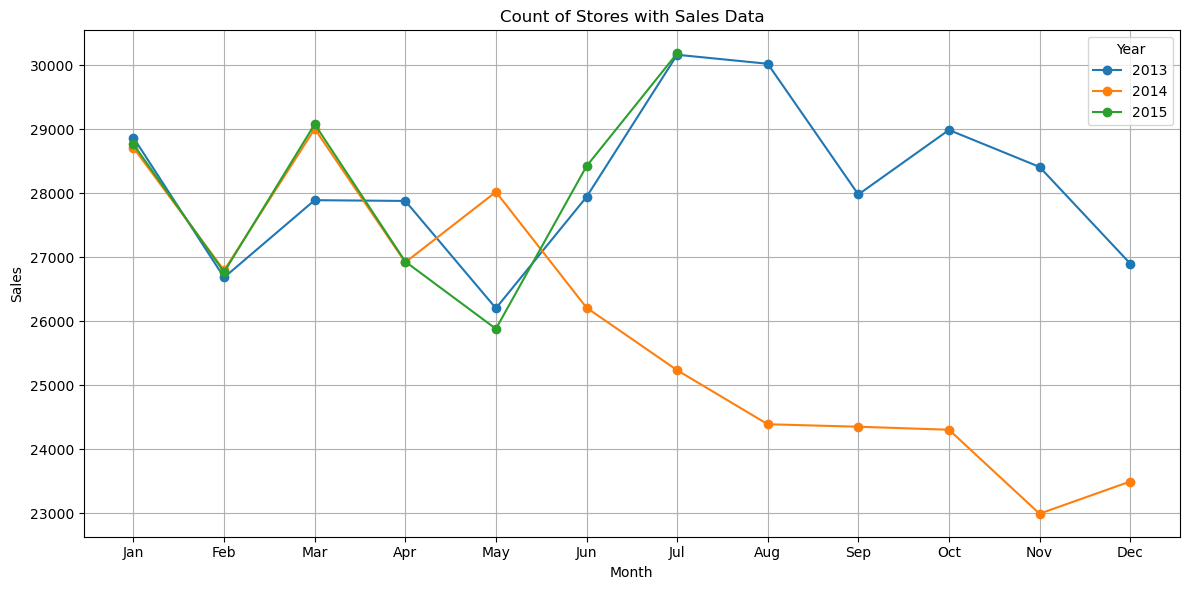

In [64]:
plt.figure(figsize=(12, 6))
for column in count_pivot.columns:
    plt.plot(count_pivot.index, count_pivot[column], marker='o', label=column)

plt.title('Count of Stores with Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

### Promo Intervals

In [65]:
promo_intervals = train_open.groupby(['PromoInterval', 'Month'])['Sales'].sum().reset_index()
promo_intervals

,PromoInterval,Month,Sales
0,0,1,292974945
1,0,2,274314844
2,0,3,309056770
3,0,4,299042517
4,0,5,296224149
5,0,6,299754172
6,0,7,319447682
7,0,8,199145812
8,0,9,188139280
9,0,10,193192613


In [66]:
# Pivot the data for plotting
interval_pivot = promo_intervals.pivot_table(values='Sales', index='Month', columns='PromoInterval', aggfunc='sum')

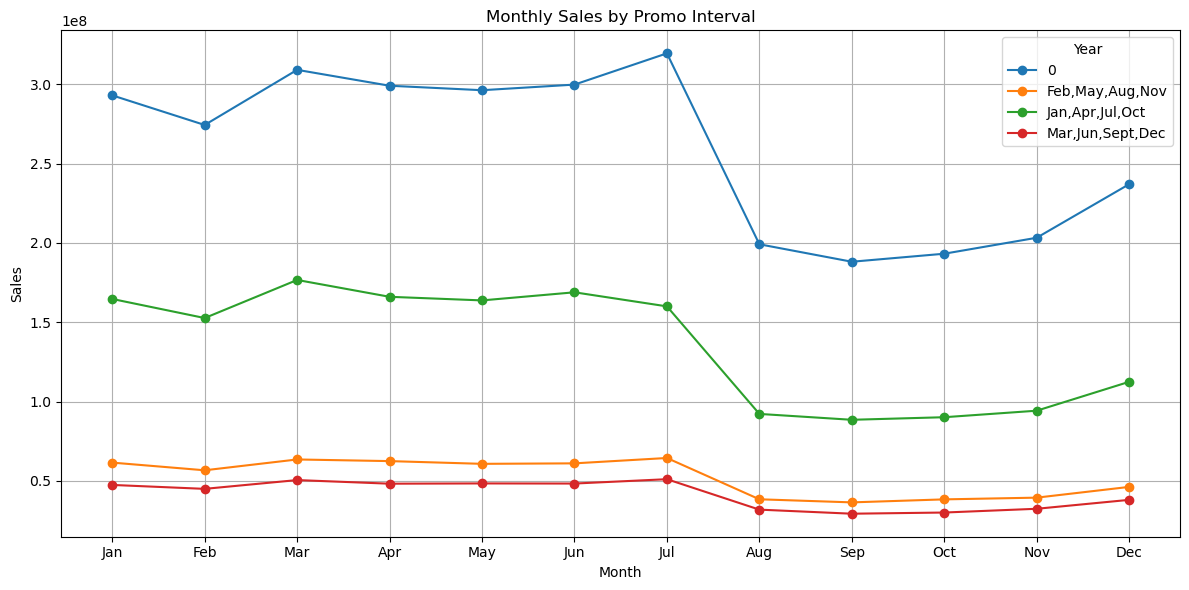

In [67]:
plt.figure(figsize=(12, 6))
for column in interval_pivot.columns:
    plt.plot(interval_pivot.index, interval_pivot[column], marker='o', label=column)

plt.title('Monthly Sales by Promo Interval')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
train_open['PromoIntervalNum'] = train_open['PromoInterval']

In [69]:
train_open['PromoIntervalNum'].value_counts()

PromoIntervalNum
0                   423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: count, dtype: int64

In [70]:
train_open.loc[train_open['PromoIntervalNum'] == 'Jan,Apr,Jul,Oct', 'PromoIntervalNum'] = 1
train_open.loc[train_open['PromoIntervalNum'] == 'Feb,May,Aug,Nov', 'PromoIntervalNum'] = 2
train_open.loc[train_open['PromoIntervalNum'] == 'Mar,Jun,Sept,Dec', 'PromoIntervalNum'] = 3

In [71]:
train_open['PromoIntervalNum'].value_counts()

PromoIntervalNum
0    423307
1    242411
2     98005
3     80669
Name: count, dtype: int64

In [72]:
train_open['PromoIntervalNum'] = train_open['PromoIntervalNum'].astype(int)

### National Promo Start Date

In [73]:
promo_start = pd.read_csv('clean_store_data.csv')
promo_start.head()

,Unnamed: 0,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,start_date,Week_Promo,Year_Promo
0,0,1,c,a,1270,0,0,0,0,0,0,0
1,1,2,a,a,570,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29 00:00:00,13,2010
2,2,3,a,a,14130,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-04 00:00:00,14,2011
3,3,4,c,c,620,0,0,0,0,0,0,0
4,4,5,a,a,29910,0,0,0,0,0,0,0


In [74]:
train = train_open.merge(promo_start[['Store', 'start_date']], how='left', on='Store')

In [75]:
train.rename(columns={'start_date' : 'Promo2Start'}, inplace=True)

In [76]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoIntervalNum,Promo2Start
0,1,5,2015-07-31,5263,555,1,nh,1,c,a,...,2008.0,0,0.0,0.0,0,2015,7,31,0,0
1,2,5,2015-07-31,6064,625,1,nh,1,a,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2010-03-29 00:00:00
2,3,5,2015-07-31,8314,821,1,nh,1,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2011-04-04 00:00:00
3,4,5,2015-07-31,13995,1498,1,nh,1,c,c,...,2009.0,0,0.0,0.0,0,2015,7,31,0,0
4,5,5,2015-07-31,4822,559,1,nh,1,a,a,...,2015.0,0,0.0,0.0,0,2015,7,31,0,0


In [77]:
train.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int32
Month                                 int32
Day                                   int32
PromoIntervalNum                      int64
Promo2Start                          object
dtype: object

In [78]:
train['Promo2Start'] = pd.to_datetime(train['Promo2Start'], errors='coerce')

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_2246/3978529402.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Promo2Start'] = pd.to_datetime(train['Promo2Start'], errors='coerce')


In [79]:
train.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int32
Month                                 int32
Day                                   int32
PromoIntervalNum                      int64
Promo2Start                  datetime64[ns]
dtype: object

In [80]:
train['Promo2New'] = np.where((train['Promo2Start'] != 0) & (train['Promo2Start'] < train['Date']), 1, 0)

In [81]:
train

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoIntervalNum,Promo2Start,Promo2New
0,1,5,2015-07-31,5263,555,1,nh,1,c,a,...,0,0.0,0.0,0,2015,7,31,0,NaT,0
1,2,5,2015-07-31,6064,625,1,nh,1,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2010-03-29,1
2,3,5,2015-07-31,8314,821,1,nh,1,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2011-04-04,1
3,4,5,2015-07-31,13995,1498,1,nh,1,c,c,...,0,0.0,0.0,0,2015,7,31,0,NaT,0
4,5,5,2015-07-31,4822,559,1,nh,1,a,a,...,0,0.0,0.0,0,2015,7,31,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,...,0,0.0,0.0,0,2013,1,1,0,NaT,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,...,0,0.0,0.0,0,2013,1,1,0,NaT,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,...,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,2012-11-26,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,...,0,0.0,0.0,0,2013,1,1,0,NaT,0


In [82]:
train = train.drop(columns= ['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'])

In [83]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,PromoInterval,Year,Month,Day,PromoIntervalNum,Promo2Start,Promo2New
0,1,5,2015-07-31,5263,555,1,nh,1,c,a,1270.0,9.0,2008.0,0,2015,7,31,0,NaT,0
1,2,5,2015-07-31,6064,625,1,nh,1,a,a,570.0,11.0,2007.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2010-03-29,1
2,3,5,2015-07-31,8314,821,1,nh,1,a,a,14130.0,12.0,2006.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2011-04-04,1
3,4,5,2015-07-31,13995,1498,1,nh,1,c,c,620.0,9.0,2009.0,0,2015,7,31,0,NaT,0
4,5,5,2015-07-31,4822,559,1,nh,1,a,a,29910.0,4.0,2015.0,0,2015,7,31,0,NaT,0


## Relationships between variables

In [84]:
train.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
PromoInterval                        object
Year                                  int32
Month                                 int32
Day                                   int32
PromoIntervalNum                      int64
Promo2Start                  datetime64[ns]
Promo2New                             int64
dtype: object

In [85]:
train['StateHolidayBool'] = train['StateHoliday']

In [86]:
train['StateHolidayBool'].value_counts()

StateHolidayBool
nh    843482
a        694
b        145
c         71
Name: count, dtype: int64

In [87]:
train.loc[train['StateHolidayBool'] == 'nh', 'StateHolidayBool'] = 0
train.loc[train['StateHolidayBool'] != 0, 'StateHolidayBool'] = 1

In [88]:
train['StateHolidayBool'].value_counts()

StateHolidayBool
0    843482
1       910
Name: count, dtype: int64

In [89]:
train['StateHolidayBool'] = train['StateHolidayBool'].astype(int)

In [90]:
train['Assortment'].value_counts()

Assortment
a    444909
c    391271
b      8212
Name: count, dtype: int64

In [91]:
train.loc[train['Assortment'] == 'a', 'Assortment'] = 1
train.loc[train['Assortment'] == 'b', 'Assortment'] = 2
train.loc[train['Assortment'] == 'c', 'Assortment'] = 3

In [92]:
train['Assortment'].value_counts()

Assortment
1    444909
3    391271
2      8212
Name: count, dtype: int64

In [93]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,PromoInterval,Year,Month,Day,PromoIntervalNum,Promo2Start,Promo2New,StateHolidayBool
0,1,5,2015-07-31,5263,555,1,nh,1,c,1,...,9.0,2008.0,0,2015,7,31,0,NaT,0,0
1,2,5,2015-07-31,6064,625,1,nh,1,a,1,...,11.0,2007.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2010-03-29,1,0
2,3,5,2015-07-31,8314,821,1,nh,1,a,1,...,12.0,2006.0,"Jan,Apr,Jul,Oct",2015,7,31,1,2011-04-04,1,0
3,4,5,2015-07-31,13995,1498,1,nh,1,c,3,...,9.0,2009.0,0,2015,7,31,0,NaT,0,0
4,5,5,2015-07-31,4822,559,1,nh,1,a,1,...,4.0,2015.0,0,2015,7,31,0,NaT,0,0


In [94]:
train['Assortment'] = train['Assortment'].astype(int)

In [95]:
train_num = train.drop(columns = ['Store', 'Date', 'StateHoliday', 'StoreType', 'PromoInterval', 'Promo2Start'])

In [96]:
# move sales for first column
col = train_num.pop('Sales')
train_num.insert(0, col.name, col)

In [97]:
train_num.dtypes

Sales                          int64
DayOfWeek                      int64
Customers                      int64
Promo                          int64
SchoolHoliday                  int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Year                           int32
Month                          int32
Day                            int32
PromoIntervalNum               int64
Promo2New                      int64
StateHolidayBool               int64
dtype: object

In [98]:
train_num.head()

,Sales,DayOfWeek,Customers,Promo,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Year,Month,Day,PromoIntervalNum,Promo2New,StateHolidayBool
0,5263,5,555,1,1,1,1270.0,9.0,2008.0,2015,7,31,0,0,0
1,6064,5,625,1,1,1,570.0,11.0,2007.0,2015,7,31,1,1,0
2,8314,5,821,1,1,1,14130.0,12.0,2006.0,2015,7,31,1,1,0
3,13995,5,1498,1,1,3,620.0,9.0,2009.0,2015,7,31,0,0,0
4,4822,5,559,1,1,1,29910.0,4.0,2015.0,2015,7,31,0,0,0


In [99]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Customers                  844392 non-null  int64  
 3   Promo                      844392 non-null  int64  
 4   SchoolHoliday              844392 non-null  int64  
 5   Assortment                 844392 non-null  int64  
 6   CompetitionDistance        844392 non-null  float64
 7   CompetitionOpenSinceMonth  577959 non-null  float64
 8   CompetitionOpenSinceYear   577959 non-null  float64
 9   Year                       844392 non-null  int32  
 10  Month                      844392 non-null  int32  
 11  Day                        844392 non-null  int32  
 12  PromoIntervalNum           844392 non-null  int64  
 13  Promo2New                  84

In [100]:
# set up variables for correlation matrix
corr = train_num.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

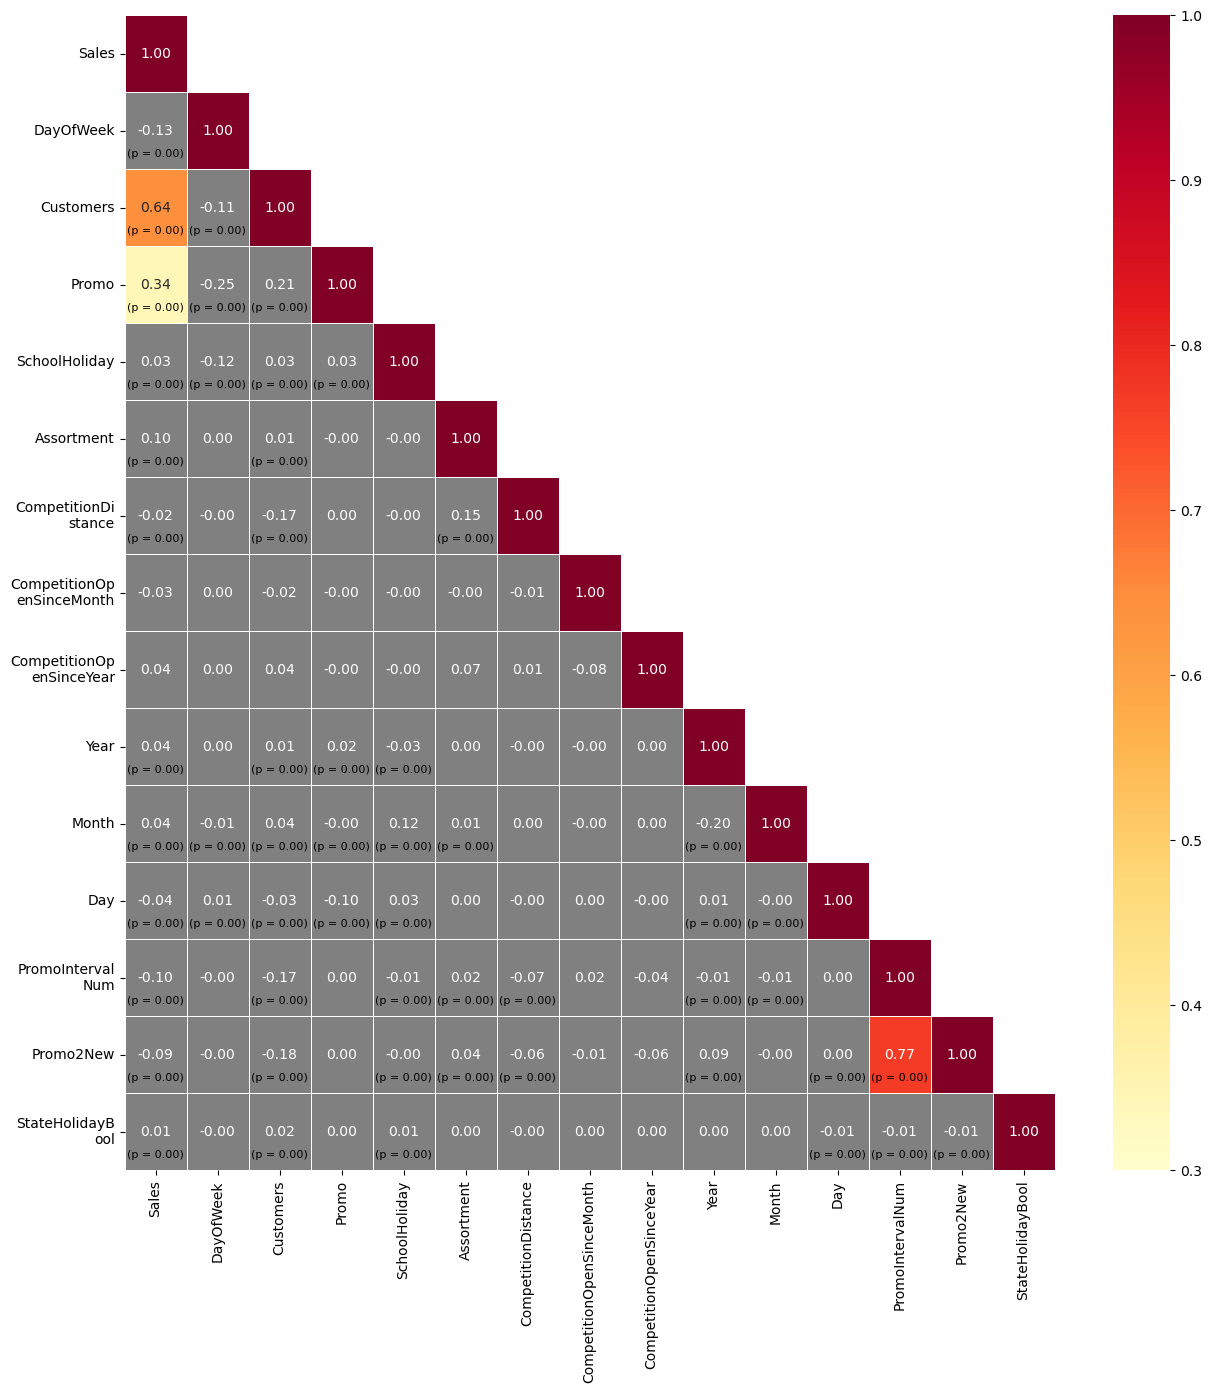

In [101]:
# highlight moderate to strong positive correlations (no negative corrs greater than -0.3)
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

f, ax = plt.subplots(figsize=(15,15)) 

g = sns.heatmap(corr,
    vmin=0.3,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 10},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = train_num.iloc[:, i]
        y = train_num.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'grey' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j + 0.8, f'(p = {p_value:.2f})',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize=8,
                    color=text_color)

# Customize y-axis labels
y_labels = [textwrap.fill(label.get_text(), 13) for label in ax.get_yticklabels()]
ax.set_yticklabels(y_labels, rotation=0, ha="right");


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  int64         
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  577959 non-null  float64 

In [103]:
train = train.drop(columns=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'PromoInterval', 'PromoIntervalNum', 'Promo2Start'])

In [104]:
train['CompetitionDistance'] = train['CompetitionDistance'].astype(int)

## Save df as csv

In [105]:
train.to_csv('train_to_model.csv')